# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [1]:
from core import crossval_table, get_color_fader
from Gaugi import mkdir_p
from copy import copy
from pprint import pprint
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt

import atlas_mpl_style as ampl
ampl.use_atlas_style()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence

Applying ATLAS style settings...

Applying ATLAS style settings...
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...


In [2]:
mkdir_p('output/crossval')
mkdir_p('output/training')

In [3]:
def create_op_dict(op, decoration='reference'):
    
    d = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              
              # op
              'pd_ref'    : decoration+"/"+op+"/pd_ref#0",
              'fa_ref'    : decoration+"/"+op+"/fa_ref#0",
              'sp_ref'    : decoration+"/"+op+"/sp_ref",
              'pd_val'    : decoration+"/"+op+"/pd_val#0",
              'fa_val'    : decoration+"/"+op+"/fa_val#0",
              'sp_val'    : decoration+"/"+op+"/sp_val",
              'pd_op'     : decoration+"/"+op+"/pd_op#0",
              'fa_op'     : decoration+"/"+op+"/fa_op#0",
              'sp_op'     : decoration+"/"+op+"/sp_op",

              # Counts
              'pd_ref_passed'    : decoration+"/"+op+"/pd_ref#1",
              'fa_ref_passed'    : decoration+"/"+op+"/fa_ref#1",
              'pd_ref_total'     : decoration+"/"+op+"/pd_ref#2",
              'fa_ref_total'     : decoration+"/"+op+"/fa_ref#2",
              'pd_val_passed'    : decoration+"/"+op+"/pd_val#1",
              'fa_val_passed'    : decoration+"/"+op+"/fa_val#1",
              'pd_val_total'     : decoration+"/"+op+"/pd_val#2",
              'fa_val_total'     : decoration+"/"+op+"/fa_val#2",
              'pd_op_passed'     : decoration+"/"+op+"/pd_op#1",
              'fa_op_passed'     : decoration+"/"+op+"/fa_op#1",
              'pd_op_total'      : decoration+"/"+op+"/pd_op#2",
              'fa_op_total'      : decoration+"/"+op+"/fa_op#2",
    })
    return d


op_names = ['tight', 'medium', 'loose', 'vloose']

tuned_info = collections.OrderedDict({})
for op in op_names:
    tuned_info[op] = create_op_dict(op, "reference")

In [4]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [5]:
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [6]:
# just for comparison
cv_v8.from_csv('../v8/output/crossval/table_v8.csv')
cv_v9.from_csv('../v9/output/crossval/table_v9.csv')
cv_v10.fill(  '/home/jodafons/public/cern_data/tunings/r1/Zee/v10/*/*/*.npz' , 'v10' )

Reading v10...: 100%|██████████| 1250/1250 [02:49<00:00,  7.39it/s]

2022-03-09 18:27:38,899 | Py.crossval_table                       INFO Reading file for v10 tag from /home/jodafons/public/cern_data/tunings/r1/Zee/v10/*/*/*.npz
2022-03-09 18:27:38,899 | Py.crossval_table                       INFO There are 1250 files for this task...
2022-03-09 18:27:38,899 | Py.crossval_table                       INFO Filling the table... 
2022-03-09 18:30:28,192 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...


In [7]:
#cv_v8.to_csv('output/crossval/table_v8.csv')
#cv_v9.to_csv('output/crossval/table_v9.csv')
cv_v10.to_csv('output/crossval/table_v10.csv')

### 1.1) Get best inits and sorts:

In [8]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]

In [9]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9, 'max_sp_op')
best_inits_v9 = best_inits_v9.loc[best_inits_v9.model_idx==0]

In [10]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10, 'max_sp_op')
best_inits_v10 = best_inits_v10.loc[best_inits_v10.model_idx==0]

In [11]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v9,
                        best_inits_v10,
                       ])
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v9,
                        best_sorts_v10,
                       ])

### 1.2) Make the table:

In [12]:
for op in op_names:
    cv_v8.dump_beamer_table( best_inits.loc[best_inits.op_name == op] ,  
                            'tuning_v10_'+op, 
                             title = op+' Tunings (v10)', 
                             tags = ['v8','v9','v10']
                           )

2022-03-09 18:30:29,952 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v10_tight.pdf latex code...
2022-03-09 18:30:31,448 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v10_medium.pdf latex code...
2022-03-09 18:30:32,836 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v10_loose.pdf latex code...
2022-03-09 18:30:34,235 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v10_vloose.pdf latex code...


In [13]:
!mv *.tex output/crossval
!mv *.pdf output/crossval

### 1.3) Plot training curves:

In [14]:
#cv_v8.plot_training_curves( best_inits_v8, best_sorts_v8 , 'output/training/v8' )
#cv_v9.plot_training_curves( best_inits_v9, best_sorts_v9 , 'output/training/v9' )
cv_v10.plot_training_curves( best_inits_v10, best_sorts_v10 , 'output/training/v10' )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


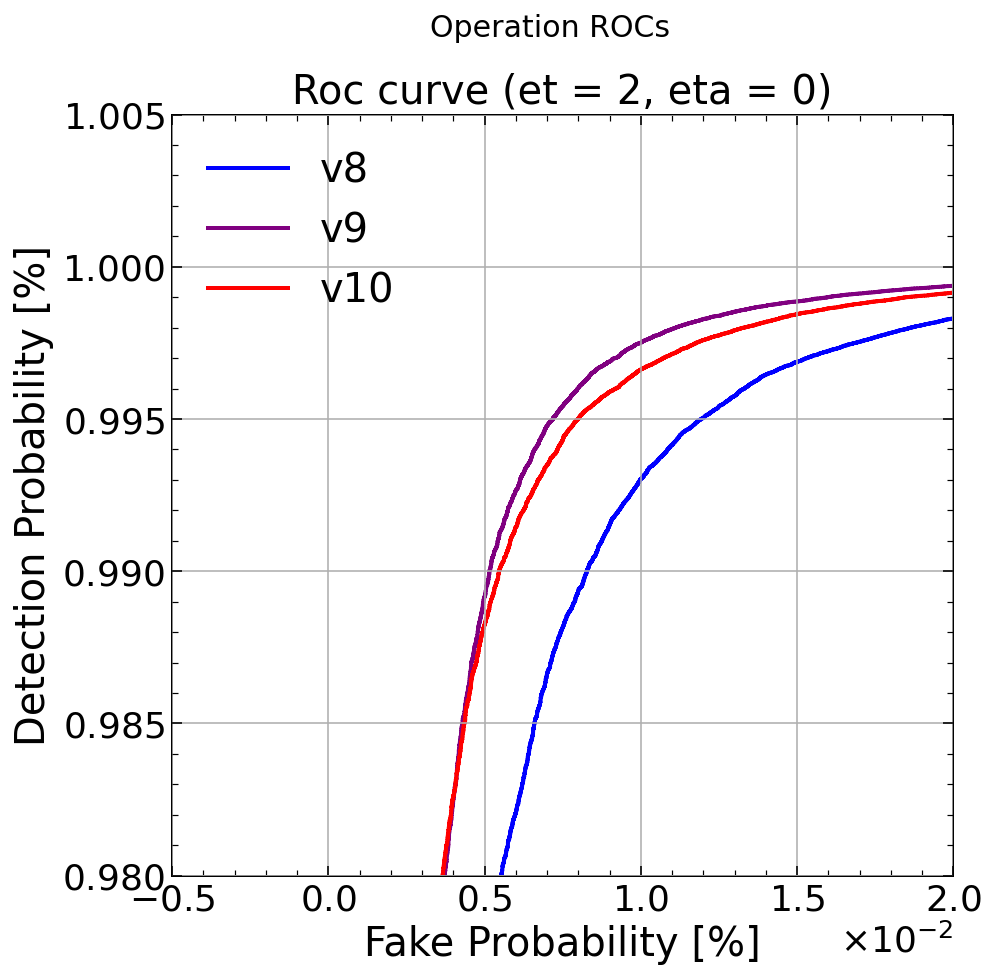

In [15]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10'], 
                        ['v8', 'v9','v10'], 
                        'output/training/roc_v8_to_v10_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',3),
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [16]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10'], 
                       ['v8', 'v9', 'v10'], 
                        'output/training/rocs_v8_to_v10.pdf',display=False, 
                       colors=get_color_fader('blue','red',3),
                       figsize=(30,30))